In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [196]:
x = np.linspace(0,100,200)
y = 0.7*x**2 + 20
print(y[:10])
for i in range(len(y)):
    y[i] += np.random.randn()*300

y = y.reshape(-1,1)

[ 20.          20.17676321  20.70705285  21.59086892  22.82821141
  24.41908033  26.36347567  28.66139744  31.31284564  34.31782026]


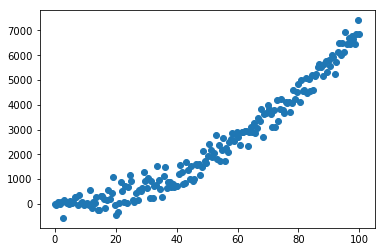

In [197]:
plt.scatter(x,y)

In [154]:
def make_design_matrix(x):
    X = np.ones((len(x), 2))
    X[:,1:] = x.reshape(-1,1)
    return X

In [155]:
def cost_function(y, y_hat):
    return np.sum(((y - y_hat)**2))/(2*len(y))

In [156]:
def init_weights(X):
    return np.zeros((X.shape[1], 1))

In [157]:
def sgd(w, X, y, alpha = 0.001):
    
    for i in range(1000):
        y_hat = X.dot(w)
        cost = cost_function(y, y_hat)
        if (i%50 == 0): print("Cost:", cost)
        gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
        #print(gradient)
        #print(w)
        w = w - alpha*gradient
    
    y_hat = X.dot(w)
    print("Final cost:", cost_function(y, y_hat))
    print(w)
    return w
    

In [165]:
def init_values(x):
    X = make_design_matrix(x)
    w = init_weights(X)
    return X, w

In [159]:
print(w.shape, X.shape, y.shape)

(2, 1) (200, 2) (200, 1)


In [203]:
X, w = init_values(x)
w_new = sgd(w, X, y, 0.000000001)
print(w_new)

Cost: 5055493.55335
Cost: 5053922.14771
Cost: 5052351.26721
Cost: 5050780.91169
Cost: 5049211.08096
Cost: 5047641.77486
Cost: 5046072.9932
Cost: 5044504.73581
Cost: 5042937.00251
Cost: 5041369.79314
Cost: 5039803.10751
Cost: 5038236.94545
Cost: 5036671.30678
Cost: 5035106.19133
Cost: 5033541.59893
Cost: 5031977.5294
Cost: 5030413.98257
Cost: 5028850.95825
Cost: 5027288.45629
Cost: 5025726.47649
Final cost: 5024165.01869
[[ 0.00235532]
 [ 0.17698308]]
[[ 0.00235532]
 [ 0.17698308]]


[[ 0.00235532]
 [ 0.17698308]]


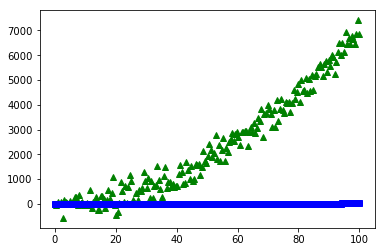

In [204]:
print(w_new)
y_pred = X.dot(w_new)
plt.plot(x, y, 'g^', x, y_pred, 'bs')

In [209]:
def sgd_new(w, X, y, alpha = 0.001):
    
    y_hat = X.dot(w)
    old_gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
    w = w - alpha*old_gradient
    
    a = 0.0000001
    for i in range(1000):
        y_hat = X.dot(w)
        cost = cost_function(y, y_hat)
#         print(cost)
        if (i%50 == 0): print("Cost:", cost, "Alpha", alpha)
        new_gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
        
#         scaled_old_gradient = (old_gradient - np.mean(old_gradient))/np.std(old_gradient)
#         scaled_new_gradient = (new_gradient - np.mean(new_gradient))/np.std(new_gradient)
        
        scaled_old_gradient = (old_gradient)/np.linalg.norm(old_gradient)
        scaled_new_gradient = (new_gradient)/np.linalg.norm(new_gradient)
        
        dlr = -np.dot(scaled_old_gradient.T, scaled_new_gradient)
        # dlr = -np.dot(old_gradient.T, new_gradient)
        # taking cos (theta)
        
        w = w - alpha* new_gradient
        alpha = alpha - a*dlr
#         print("alpha:", alpha)
        old_gradient = new_gradient
        
    y_hat = X.dot(w)
    print("Final cost:", cost_function(y, y_hat))
    print(w)
    return w
        

Cost: 5055462.12009 Alpha 1e-09
Cost: 2416474.79175 Alpha [[  5.00100000e-06]]
Cost: 518799.027488 Alpha [[  1.00010000e-05]]
Cost: 355638.751562 Alpha [[  1.50009942e-05]]
Cost: 353214.322038 Alpha [[  1.99999426e-05]]
Cost: 353112.353701 Alpha [[  2.49993324e-05]]
Cost: 352994.803151 Alpha [[  2.99993319e-05]]
Cost: 352855.947789 Alpha [[  3.49993319e-05]]
Cost: 352695.837583 Alpha [[  3.99993319e-05]]
Cost: 352514.532838 Alpha [[  4.49993319e-05]]
Cost: 352312.101802 Alpha [[  4.99993319e-05]]
Cost: 352088.620621 Alpha [[  5.49993319e-05]]
Cost: 351844.17329 Alpha [[  5.99993319e-05]]
Cost: 351578.851603 Alpha [[  6.49993319e-05]]
Cost: 351292.755094 Alpha [[  6.99993319e-05]]
Cost: 350985.990973 Alpha [[  7.49993319e-05]]
Cost: 350658.674065 Alpha [[  7.99993319e-05]]
Cost: 350310.926731 Alpha [[  8.49993319e-05]]
Cost: 349942.878796 Alpha [[  8.99993319e-05]]
Cost: 349554.667468 Alpha [[  9.49993319e-05]]
Final cost: 349146.437252
[[-13.74525229]
 [ 53.25469059]]
[[-13.74525229]
 

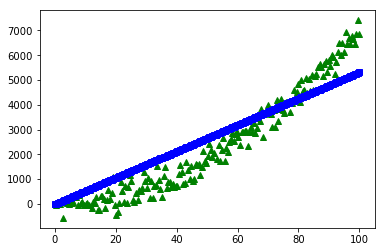

In [210]:
X, w = init_values(x)
w_new = sgd_new(w, X, y, 0.000000001)
print(w_new)
y_pred = X.dot(w_new)
plt.plot(x, y, 'g^', x, y_pred, 'bs')